In [59]:
#Site locations [lat,lon]
HarvardForest = [42.53415, -72.17147]
Chacaltaya = [-16.35352,-68.13150]
GunnPoint = [-12.24912,131.04459]

#Required packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import function as f
import os

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
import cartopy.crs as ccrs
import cartopy.feature as cfeature

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

figpath = '../figures'

In [60]:
#make quick script for saving average sensitivity field.

In [61]:
def zerofilter(data,thresh=1e-10):
    zf = data.where(data>thresh)    
    return zf

In [62]:
#harvard forest
datapath = '../../Model_data/HarvardForest/'

In [63]:
MERRA2_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Harvard/MERRA2_0p5/2019/out/footprints/'
GFS_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Harvard/GFS_0p25/2019/out/footprints/'
NAM_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Harvard/nam12/2019/out/footprints/'

In [64]:
#MERRA2
filename = 'HF_merra2_avgsens.nc'
path = MERRA2_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [65]:
#GFS
filename = 'HF_gfs_avgsens.nc'
path = GFS_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [67]:
#nam
filename = 'HF_nam_avgsens.nc'
path = NAM_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [68]:
#ATARS
datapath = '../../Model_data/ATARS/'

In [69]:
MERRA2_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/GunnPoint/MERRA2_0p5/2014/out/footprints/'
GDAS_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/GunnPoint/gdas_0p5/2014/out/footprints/'

In [70]:
#MERRA2
filename = 'ATARS_merra2_avgsens.nc'
path = MERRA2_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [71]:
#MERRA2
filename = 'ATARS_gdas_avgsens.nc'
path = GDAS_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [72]:
#chacaltaya
datapath = '../../Model_data/CHC/'

In [73]:
MERRA2_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Chacaltaya/MERRA2_0p5/2014_2015_all/out/footprints/'
GDAS_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Chacaltaya/gdas_0p5/2014_2015_all/out/footprints/'

In [74]:
#MERRA2
filename = 'CHC_merra2_avgsens.nc'
path = MERRA2_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [75]:
#GDAS
filename = 'CHC_gdas_avgsens.nc'
path = GDAS_path

flist = os.listdir(path)

for file in flist:
    ds = xr.open_dataset(path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,None)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")

ds_concat = ds_concat.sortby('time').mean(dim='time')
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

ds_concat.to_netcdf(datapath+filename)

In [12]:
pd.read_csv('../../Model_data/ATARS/STILT'+'ST_gdas_gfed.csv')

,time,gdas_gfed_ngm-3
0,2015-06-01 00:00:00,0.017796
1,2015-06-01 01:00:00,0.008804
2,2015-06-01 02:00:00,0.008804
3,2015-06-01 03:00:00,0.008804
4,2015-06-01 04:00:00,0.007292
...,...,...
2921,2015-09-30 17:00:00,0.007158
2922,2015-09-30 18:00:00,0.007158
2923,2015-09-30 19:00:00,0.041815
2924,2015-09-30 20:00:00,0.041815


In [15]:
ds_bb,df_bb = f.read_gc('GunnPoint',GunnPoint,run='run0018',surf=True)
ds_nobb,df_nobb = f.read_gc('GunnPoint',GunnPoint,run='run0019',surf=True)
ds_nont,df_nont = f.read_gc('GunnPoint',GunnPoint,run='run0038',surf=True)

#Nested res
ds_bb_n,df_bb_n = f.read_gc('GunnPoint',GunnPoint,run='run0022',surf=True)
ds_nobb_n,df_nobb_n = f.read_gc('GunnPoint',GunnPoint,run='run0023',surf=True)
ds_nont_n,df_nont_n = f.read_gc('GunnPoint',GunnPoint,run='run0039',surf=True)


df_bb = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

df_bb['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

df_bb['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb = df_bb[df_bb.index>=d_start]
df_bb = df_bb[df_bb.index<=d_end]

#merge with obs
df_bb = pd.merge(df_bb,obs['conc5_avg'],left_index=True,right_index=True).dropna()

#resample to specified frequency
df_bb = df_bb.resample(resample).mean()
df_bb_roll = df_bb.rolling(rolling_period,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb_nonan = df_bb.dropna()
df_bb_nonan_r = df_bb_roll.loc[df_bb_nonan.index]
df_bb_dt = df_bb_nonan - df_bb_nonan_r                          #Detrended observations and model


In [16]:
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = df_bb_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (df_bb_nonan[obs_name]*SF_err).dropna()

<xarray.Dataset>
Dimensions:            (time: 26304, lat: 13, lon: 9)
Coordinates:
  * time               (time) datetime64[ns] 2014-01-01 ... 2016-12-31T23:00:00
    lev                float64 ...
  * lat                (lat) float64 -24.0 -22.0 -20.0 -18.0 ... -4.0 -2.0 0.0
  * lon                (lon) float64 120.0 122.5 125.0 ... 135.0 137.5 140.0
Data variables:
    SpeciesConcVV_Hg0  (time, lat, lon) float64 1.023 1.027 1.02 ... nan nan nan

In [18]:
Create_Inputs = True
Run_MCMC = True

#Site locations [lat,lon]
GunnPoint = [-12.24912,131.04459]

#Required packages
import numpy as np
import pandas as pd
import xarray as xr
import function as f

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform


#user inputs

In [20]:
preprocess_inputs = True #set to True if raw GEOS-Chem, STILT outputs are available. False uses preprocessed outputs.

year =           2015
rolling_period = 60
bounds =         [0,30]
MCMC_iter =      100000

d_start =        str(year)+'-06-01'   #start date
d_end =          str(year)+'-10-01'   #end date (I think this is inclusive, need to confirm)

resample =       '1D'
obs_name =       'conc5_avg'
stat =           'IQR'
df_path =        '../posteriors/'
model_out_path = '../../Model_data/ATARS/STILT'


#errors (based on Song et al., 2015)
IC_err = 10 #%
Pr_err = 2 #%

#important for model-measurement errors
x_grid = 2.5
y_grid = 2

x_n_grid = 0.625
y_n_grid = 0.5

SamplingFrequency_agg = True
GFED_preprocess=False

obs = f.read_obs('GunnPoint',test=True)
obs = obs.set_index('date')

#outliers on September 9th and 10th right before instrument failure. Removing from dataset.
if year == 2015:
    obs = obs[obs.index<'2015-09-09']

#Base res
ds_bb,df_bb = f.read_gc('GunnPoint',GunnPoint,run='run0018',surf=True)
ds_nobb,df_nobb = f.read_gc('GunnPoint',GunnPoint,run='run0019',surf=True)
ds_nont,df_nont = f.read_gc('GunnPoint',GunnPoint,run='run0038',surf=True)

#Nested res
ds_bb_n,df_bb_n = f.read_gc('GunnPoint',GunnPoint,run='run0022',surf=True)
ds_nobb_n,df_nobb_n = f.read_gc('GunnPoint',GunnPoint,run='run0023',surf=True)
ds_nont_n,df_nont_n = f.read_gc('GunnPoint',GunnPoint,run='run0039',surf=True)

if GFED_preprocess==True:
    #creating daily GFED4s inputs from raw GEOS-Chem Data
    #outpath file 
    inpath = '../../Model_data/ATARS/Priors/GFED4s/'
    outpath = '../../Model_data/ATARS/Priors/GFED4s/processed/'

    f.GFED4s_emission_dataset([year],np.arange(0,12)+1,inpath,outpath,hourly=False)
    
#read in GFED, FINN
GFED4s = xr.open_mfdataset('../../Model_data/ATARS/Priors/GFED4s/processed/GFED4s*.nc4').drop_vars('DM_TOTL')
FINN = xr.open_dataset('../../Model_data/ATARS/Priors/FINN/FINN_daily_'+str(year)+'_0.25x0.25.compressed.nc')
#FINN = xr.open_dataset('/net/fs03/d0/emroy/STILT/FINN1p6/FINNv1.6_'+str(year)+'_GEOSChem.daily.nc')

#scaling factors
GFED_ef = f.output2CO('GFED4s')
FINN1p5_ef = f.output2CO('FINN')
#FINN1p6_ef = f.output2CO('FINN1.6')

#converting GFED
ltype = ['SAVA','DEFO','TEMP','BORF','PEAT','AGRI']
for i in ltype:
    GFED4s['CO_'+i] = GFED4s['DM_'+i]*GFED_ef.loc[i]['Emission_Factors_GC']
    GFED4s = GFED4s.drop_vars('DM_'+i)
    #units are in kg CO m-2 s-1, these were lost in the conversion step in GFED4s_emission_dataset()

ltype = [1,2,3,4,5,9]
lname = ['Savanna','WoodySavanna','Tropical','Temperate','Boreal','Crops']
j=0
for i in ltype:
    FINN['CO_'+lname[j]] = FINN['fire_vegtype'+str(i)]/FINN1p5_ef[FINN1p5_ef['GenVegCode']==i]['CO2/CO'].values[0]
    FINN = FINN.drop_vars('fire_vegtype'+str(i))
    j = j+1

FINN = FINN.drop_vars(['lon_bounds','lat_bounds'])

#calculating total emissions from each landtype
GFED4s['CO_TOT'] = GFED4s['CO_SAVA']+GFED4s['CO_DEFO']+GFED4s['CO_TEMP']+GFED4s['CO_BORF']+GFED4s['CO_PEAT']+GFED4s['CO_AGRI']
FINN['CO_TOT'] = FINN['CO_Savanna']+FINN['CO_WoodySavanna']+FINN['CO_Tropical']+FINN['CO_Temperate']+FINN['CO_Boreal']+FINN['CO_Crops']

#area required for calculation of priors
gfed_area = xr.open_dataset('../../Model_data/ATARS/Priors/GFED4s/processed/GFED4s_gridarea.nc')

#need to add preprocess switch like I did for GEOS-Chem

if preprocess_inputs == True:

    # --- GDAS 0.5° x 0.5°, GFED4s ---

    path_stilt = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/'
    loc = 'GunnPoint'
    run = 'gdas_0p5'

    inventory = f.inventory_regrid(GFED4s,path=path_stilt,loc=loc,run=run,year=str(year),dummyfile=str(year)+'06150000_131.038_-12.262_5_foot.nc',t_res='H',specific_path=False)
    contrib = f.gridbox_contribution_STILT(inventory,path=path_stilt,vstr='CO_TOT',rec_height='5',loc=loc,run=run,year=str(year),df=False,receptor_filt=False,specific_path=False)
    df = contrib.sum(('lat','lon')).to_dataframe()*7.17e-7*1e12
    gdas_gfed_df = df.rename(columns={'CO_TOT':'gdas_gfed_ngm-3'}).resample('1H').bfill()
    gdas_gfed_df.to_csv(model_out_path+'ST_gdas_gfed.csv')


    # --- GDAS 0.5° x 0.5°, FINN1.5 ---

    path_stilt = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/'
    loc = 'GunnPoint'
    run = 'gdas_0p5'

    inventory = f.inventory_regrid(FINN,path=path_stilt,loc=loc,run=run,year=str(year),dummyfile=str(year)+'06150000_131.038_-12.262_5_foot.nc',t_res='H',specific_path=False)
    contrib = f.gridbox_contribution_STILT(inventory,path=path_stilt,vstr='CO_TOT',rec_height='5',loc=loc,run=run,year=str(year),df=False,receptor_filt=False,specific_path=False)
    df = contrib.sum(('lat','lon')).to_dataframe()*7.17e-7*1e12
    gdas_finn_df = df.rename(columns={'CO_TOT':'gdas_finn_ngm-3'}).resample('1H').bfill()
    gdas_finn_df.to_csv(model_out_path+'ST_gdas_finn.csv')


    # --- MERRA2 0.5° x 0.5°, GFED4s ---

    path_stilt = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/'
    loc = 'GunnPoint'
    run = 'MERRA2_0p5'

    inventory = f.inventory_regrid(GFED4s,path=path_stilt,loc=loc,run=run,year=str(year),dummyfile=str(year)+'06150000_131.038_-12.262_5_foot.nc',t_res='H',specific_path=False)
    contrib = f.gridbox_contribution_STILT(inventory,path=path_stilt,vstr='CO_TOT',rec_height='5',loc=loc,run=run,year=str(year),df=False,receptor_filt=False,specific_path=False)
    df = contrib.sum(('lat','lon')).to_dataframe()*7.17e-7*1e12
    merra_gfed_df = df.rename(columns={'CO_TOT':'merra_gfed_ngm-3'}).resample('1H').bfill()
    merra_gfed_df.to_csv(model_out_path+'ST_merra_gfed.csv')


    # --- MERRA2 0.5° x 0.5°, FINN1.5 ---

    path_stilt = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/'
    loc = 'GunnPoint'
    run = 'MERRA2_0p5'

    inventory = f.inventory_regrid(FINN,path=path_stilt,loc=loc,run=run,year=str(year),dummyfile=str(year)+'06150000_131.038_-12.262_5_foot.nc',t_res='H',specific_path=False)
    contrib = f.gridbox_contribution_STILT(inventory,path=path_stilt,vstr='CO_TOT',rec_height='5',loc=loc,run=run,year=str(year),df=False,receptor_filt=False,specific_path=False) 
    df = contrib.sum(('lat','lon')).to_dataframe()*7.17e-7*1e12
    merra_finn_df = df.rename(columns={'CO_TOT':'merra_finn_ngm-3'}).resample('1H').bfill()
    merra_finn_df.to_csv(model_out_path+'ST_merra_finn.csv')

if preprocess_inputs == False:
    gdas_gfed_df = pd.read_csv(model_out_path+'ST_gdas_gfed.csv')
    gdas_finn_df = pd.read_csv(model_out_path+'ST_gdas_finn.csv')
    merra_gfed_df = pd.read_csv(model_out_path+'ST_merra_gfed.csv')
    merra_finn_df = pd.read_csv(model_out_path+'ST_merra_finn.csv')
    

# --- merge observations and gc, subset for desired period ---
df_bb = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

df_bb['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

df_bb['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb = df_bb[df_bb.index>=d_start]
df_bb = df_bb[df_bb.index<=d_end]

#merge with obs
df_bb = pd.merge(df_bb,obs['conc5_avg'],left_index=True,right_index=True).dropna()

#resample to specified frequency
df_bb = df_bb.resample(resample).mean()
df_bb_roll = df_bb.rolling(rolling_period,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb_nonan = df_bb.dropna()
df_bb_nonan_r = df_bb_roll.loc[df_bb_nonan.index]
df_bb_dt = df_bb_nonan - df_bb_nonan_r                          #Detrended observations and model

In [22]:
#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard95_IC,random95_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard95_Pr,random95_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
if hourly_obs == True:
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data


    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()
        
if hourly_obs == False:
    #Raw observations were available at hourly resolution, uploaded data are at daily resolution. 
    #reading in precomputed values from above!

standard95_SF,random95_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)


ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.norm` documentation for details.

In [25]:
df_bb_nonan[obs_name]

2015-06-01    0.972532
2015-06-02    0.985491
2015-06-03    0.965943
2015-06-04    0.903542
2015-06-05    0.884221
                ...   
2015-09-04    1.023713
2015-09-05    0.948342
2015-09-06    0.969640
2015-09-07    0.954160
2015-09-08    0.898935
Freq: D, Name: conc5_avg, Length: 100, dtype: float64

In [28]:
dailystd/np.sqrt(dailycnt)

date
2014-06-15   NaN
2014-06-16   NaN
2014-06-17   NaN
2014-06-18   NaN
2014-06-19   NaN
              ..
2015-09-04   NaN
2015-09-05   NaN
2015-09-06   NaN
2015-09-07   NaN
2015-09-08   NaN
Freq: D, Name: conc5_avg, Length: 451, dtype: float64

In [30]:
dailycnt

date
2014-06-15    1
2014-06-16    1
2014-06-17    1
2014-06-18    1
2014-06-19    1
             ..
2015-09-04    1
2015-09-05    1
2015-09-06    1
2015-09-07    1
2015-09-08    1
Freq: D, Name: conc5_avg, Length: 451, dtype: int64

In [36]:
new = pd.read_csv('/home/emroy/GP/ACP/scripts/final/paper_staging/VariabilityInversion/Inversion/posteriors/GunnPoint_posterior_2015_IQR.csv')
old = pd.read_csv('/home/emroy/GP/ACP/scripts/final/paper_staging/VariabilityInversion/Inversion/posteriors/GunnPoint_posterior_2015_IQR_orig.csv')

In [37]:
new

,Unnamed: 0,gc,gc_n,merra2_gfed,gdas_gfed,merra2_finn,gdas_finn
0,0,1.965843,1.965843,1.965843,1.965843,0.390786,0.390786
1,1,6.161629,1.965843,2.508021,1.965843,2.000794,0.390786
2,2,10.446593,1.065390,2.508021,1.965843,2.000794,0.390786
3,3,12.013979,4.006570,2.508021,1.965843,2.000794,1.009924
4,4,10.792005,4.006570,2.508021,1.965843,2.000794,1.009924
...,...,...,...,...,...,...,...
99996,99996,0.098874,0.933700,3.023450,1.189910,3.569869,1.691378
99997,99997,10.740626,0.933700,0.257393,1.189910,3.569869,1.691378
99998,99998,7.866474,3.318374,0.257393,1.189910,3.569869,1.871813
99999,99999,7.188785,3.318374,0.058792,1.189910,3.569869,1.550747


(array([ 7890.,  9952., 16111., 21582., 23276., 14457.,  5251.,  1107.,
          323.,    52.]),
 array([2.47201910e-04, 2.07927103e+00, 4.15829486e+00, 6.23731869e+00,
        8.31634252e+00, 1.03953664e+01, 1.24743902e+01, 1.45534140e+01,
        1.66324378e+01, 1.87114617e+01, 2.07904855e+01]),
 <BarContainer object of 10 artists>)

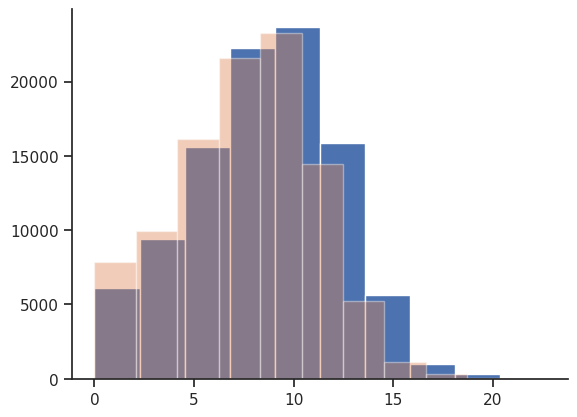

In [39]:
plt.hist(old['gc'])
plt.hist(new['gc'],alpha=0.4)

(array([16853., 18001., 19875., 20361., 14523.,  6435.,  2833.,   913.,
          177.,    30.]),
 array([2.13642450e-04, 6.09208098e-01, 1.21820255e+00, 1.82719701e+00,
        2.43619146e+00, 3.04518592e+00, 3.65418037e+00, 4.26317483e+00,
        4.87216928e+00, 5.48116374e+00, 6.09015819e+00]),
 <BarContainer object of 10 artists>)

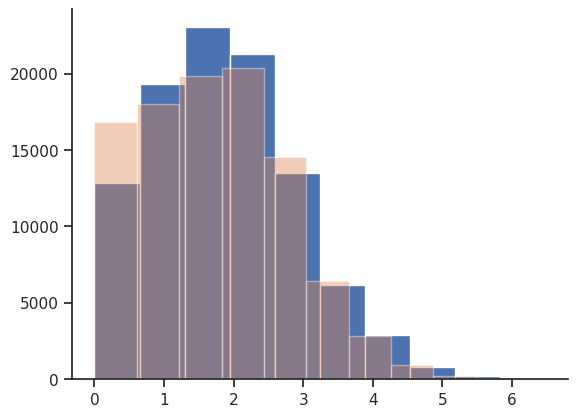

In [35]:
plt.hist(old['merra2_gfed'])
plt.hist(new['merra2_gfed'],alpha=0.4)

In [42]:
np.arange(0,10)[-4:]

array([6, 7, 8, 9])

In [44]:
r = xr.open_dataset('/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Harvard/nam12/2019/out/footprints/201909302100_-72.173_42.537_30_foot.nc')

In [46]:
r

<xarray.Dataset>
Dimensions:  (lon: 100, lat: 100, time: 24)
Coordinates:
  * lon      (lon) float64 -79.95 -79.85 -79.75 -79.65 ... -70.25 -70.15 -70.05
  * lat      (lat) float64 40.05 40.15 40.25 40.35 ... 49.65 49.75 49.85 49.95
  * time     (time) datetime64[ns] 2019-09-29T21:00:00 ... 2019-09-30T20:00:00
Data variables:
    foot     (time, lat, lon) float32 ...
Attributes:
    crs:            +proj=longlat
    crs_format:     PROJ.4
    documentation:  github.com/uataq/stilt
    title:          STILT Footprint
    time_created:   2025-03-07 12:45:24

In [51]:
r.isel(time=slice(-24,None))

<xarray.Dataset>
Dimensions:  (lon: 100, lat: 100, time: 24)
Coordinates:
  * lon      (lon) float64 -79.95 -79.85 -79.75 -79.65 ... -70.25 -70.15 -70.05
  * lat      (lat) float64 40.05 40.15 40.25 40.35 ... 49.65 49.75 49.85 49.95
  * time     (time) datetime64[ns] 2019-09-29T21:00:00 ... 2019-09-30T20:00:00
Data variables:
    foot     (time, lat, lon) float32 ...
Attributes:
    crs:            +proj=longlat
    crs_format:     PROJ.4
    documentation:  github.com/uataq/stilt
    title:          STILT Footprint
    time_created:   2025-03-07 12:45:24

In [ ]:
#random junk, tests

In [2]:
def zerofilter(data,thresh=1e-10):
    zf = data.where(data>thresh)    
    return zf

In [3]:
MERRA2_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Chacaltaya/MERRA2_0p5/2014_2015_all/out/footprints/'
GDAS_path = '/net/fs03/d0/emroy/STILT/STILTrundir/Royetal_ACP/Chacaltaya/gdas_0p5/2014_2015_all/out/footprints/'

In [4]:
#Updated simulation, 0.5deg resolution, June-August 2014
flist = os.listdir(MERRA2_path)

In [5]:
#loop over files, find summed footprint over each file.
#at each step in the loop, append summed footprint to a dataarray

In [6]:
for file in flist:
    ds = xr.open_dataset(MERRA2_path+file)
    time = ds.time[-1].values
    ds = ds.sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")
    

In [39]:
#ds_concat = ds_concat.sel(time=ds_concat.time < pd.to_datetime('2015-05-01'))

Text(0.5, 1.0, 'Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nNovember 2014-April 2015')

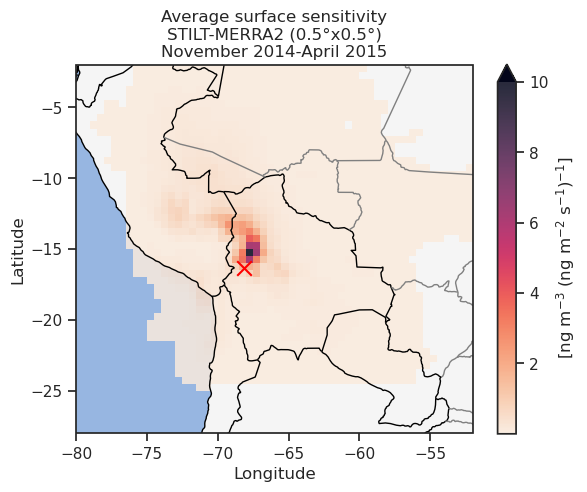

In [7]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -52
latmin = -28
latmax = -2
ext = [lonmin, lonmax, latmin, latmax]

avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Chacaltaya[1],Chacaltaya[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-75,-70,-65,-60,-55],crs=ccrs.PlateCarree())
ax.set_yticks([-25,-20,-15,-10,-5],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nNovember 2014-April 2015')
#plt.savefig(figpath+'CH_STILTMERRA2_sens.png',transparent=True,dpi=350)

In [10]:
for file in flist:
    ds = xr.open_dataset(MERRA2_path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,-1)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")
    

In [11]:
#ds_concat = ds_concat.sel(time=ds_concat.time < pd.to_datetime('2015-05-01'))

Text(0.5, 1.0, 'Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nNovember 2014-April 2015')

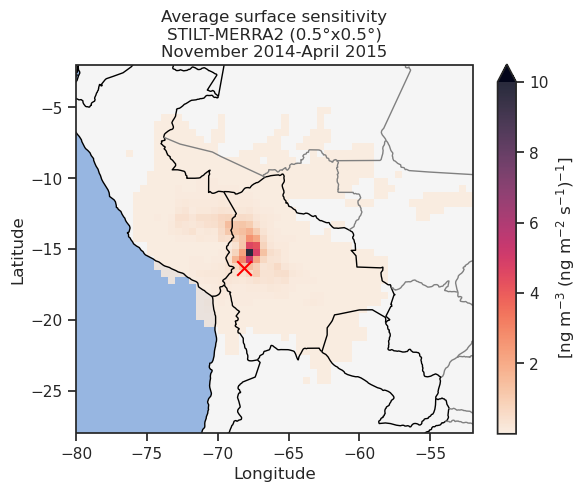

In [12]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -52
latmin = -28
latmax = -2
ext = [lonmin, lonmax, latmin, latmax]

avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Chacaltaya[1],Chacaltaya[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-75,-70,-65,-60,-55],crs=ccrs.PlateCarree())
ax.set_yticks([-25,-20,-15,-10,-5],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nNovember 2014-April 2015')
#plt.savefig(figpath+'CH_STILTMERRA2_sens.png',transparent=True,dpi=350)

In [13]:
#Updated simulation, 0.5deg resolution, June-August 2014
flist = os.listdir(GDAS_path)

In [14]:
#loop over files, find summed footprint over each file.
#at each step in the loop, append summed footprint to a dataarray

In [15]:
for file in flist:
    ds = xr.open_dataset(GDAS_path+file)
    time = ds.time[-1].values
    ds = ds.isel(time=slice(-24,-1)).sum(dim='time')
    ds = ds.expand_dims(dim={"time":[time]}, axis=2)
    
    if file == flist[0]:
        ds_concat = ds
    else:
        ds_concat = xr.concat([ds_concat,ds],dim="time")
    

In [44]:
ds_concat = ds_concat.sortby('time')
#ds_concat = ds_concat.sel(time=ds_concat.time < pd.to_datetime('2015-05-01'))

Text(0.5, 1.0, 'Average surface sensitivity\nSTILT-GDAS (0.5°x0.5°)\nNovember 2014-April 2015')

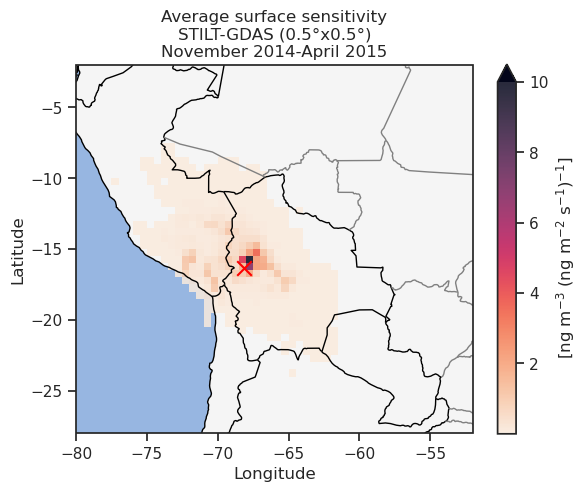

In [16]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -52
latmin = -28
latmax = -2
ext = [lonmin, lonmax, latmin, latmax]

avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Chacaltaya[1],Chacaltaya[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-75,-70,-65,-60,-55],crs=ccrs.PlateCarree())
ax.set_yticks([-25,-20,-15,-10,-5],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-GDAS (0.5°x0.5°)\nNovember 2014-April 2015')
#plt.savefig(figpath+'CH_STILTGDAS_sens.png',transparent=True,dpi=350)

In [18]:
ds_concat

<xarray.Dataset>
Dimensions:  (time: 1907, lon: 70, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2014-10-31 ... 2015-03-04T20:00:00
  * lon      (lon) float64 -84.75 -84.25 -83.75 -83.25 ... -51.25 -50.75 -50.25
  * lat      (lat) float64 -24.75 -24.25 -23.75 -23.25 ... -1.25 -0.75 -0.25
Data variables:
    foot     (lat, lon, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [19]:
ds_concat['foot'].attrs['units'] = 'ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$'

In [20]:
ds_concat

<xarray.Dataset>
Dimensions:  (time: 1907, lon: 70, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2014-10-31 ... 2015-03-04T20:00:00
  * lon      (lon) float64 -84.75 -84.25 -83.75 -83.25 ... -51.25 -50.75 -50.25
  * lat      (lat) float64 -24.75 -24.25 -23.75 -23.25 ... -1.25 -0.75 -0.25
Data variables:
    foot     (lat, lon, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [51]:
new = pd.read_csv('/home/emroy/GP/ACP/scripts/final/paper_staging/VariabilityInversion/Inversion/posteriors/HarvardForest_posterior_IQR.csv')
old = pd.read_csv('/home/emroy/GP/ACP/scripts/final/paper_staging/VariabilityInversion/Inversion/posteriors/HarvardForest_posterior_IQR_orig.csv')

(array([10847., 12927., 16668., 20419., 19751., 12387.,  4665.,  1921.,
          352.,    64.]),
 array([1.52964118e-03, 3.47745796e+00, 6.95338628e+00, 1.04293146e+01,
        1.39052429e+01, 1.73811712e+01, 2.08570996e+01, 2.43330279e+01,
        2.78089562e+01, 3.12848845e+01, 3.47608129e+01]),
 <BarContainer object of 10 artists>)

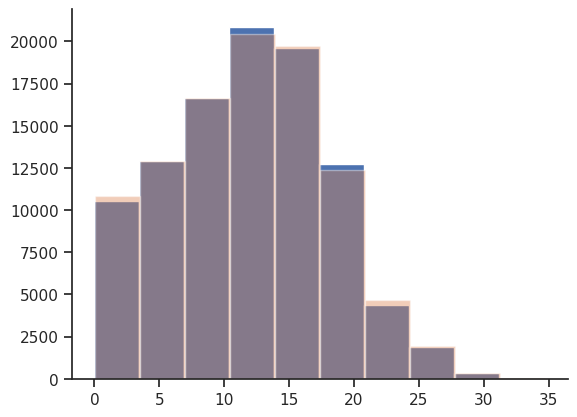

In [52]:
plt.hist(old['gc'])
plt.hist(new['gc'],alpha=0.4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f195150a020>,
 'caps': [<matplotlib.lines.Line2D at 0x7f195150a5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1951509e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f195150ab60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f195150ae30>],
 'means': []}

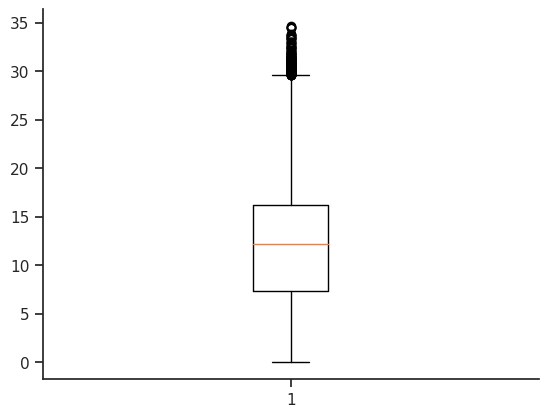

In [28]:
plt.boxplot(old['gc'])

In [53]:
eroy_path = '/net/fs03/d0/emroy/Shakes/gc_data/' #these data were copied from Shakes' and Ari's directories. Look at script referenced above for native file locations

#reading in
Base   = xr.open_dataset(eroy_path+'Base/GEOSChem.SpeciesConcBaseHeigt_levels.nc4') #.isel(height=0)


In [54]:
Base

<xarray.Dataset>
Dimensions:          (time: 730, lon: 144, lat: 91, height: 1)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-01T12:00:00 ... 2015-12-31...
  * lon              (lon) float64 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lat              (lat) float64 -89.5 -88.0 -86.0 -84.0 ... 86.0 88.0 89.5
  * height           (height) float64 5.24e+03
Data variables:
    ps               (time, lat, lon) float32 ...
    SpeciesConc_Hg0  (time, height, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    title:                           GEOS-Chem diagnostic collection: Species...
    format:                          CFIO
    conventions:                     COARDS
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    ...                              ...
    simulation_start_date_and_time:  2014-01-01 00:00:00z
    simulation_end_date_and_time:    2016-01-01 00:00:00z
    history_of_appended_files:       Tue Aug 17 08:21:56 2021: Appended file ...
    history:                         Wed Aug 25 22:57:33 2021: cdo -L ml2hl,5...
    NCO:                             netCDF Operators version 4.8.1 (Homepage...
    CDO:                             Climate Data Operators version 1.9.10 (h...